In [12]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('')
print('x_train.shape : {0}, t_train.shape : {1}'.format(x_train.shape, t_train.shape))
print('x_test.shape : {0}, t_test.shape : {1}'.format(x_test.shape, t_test.shape))

4431872/4422102 [==============================] - 0s 0us/step

x_train.shape : (60000, 28, 28), t_train.shape : (60000,)
x_test.shape : (10000, 28, 28), t_test.shape : (10000,)


<function matplotlib.pyplot.show>

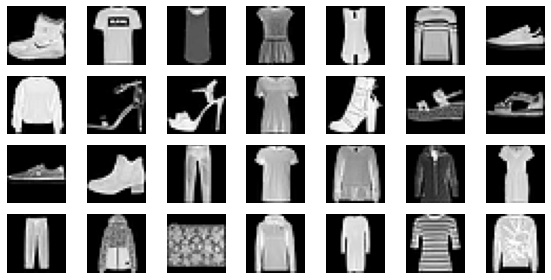

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

for index in range(28):
    plt.subplot(4, 7, index+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show

In [4]:
# Normalize 0 ~ 1

x_train = x_train / 255.0
x_test = x_test / 255.0

print('train max : {0}, train min : {1}'.format(x_train.max(), x_train.min()))
print('test max : {0}, test min : {1}'.format(x_test.max(), x_test.min()))

train max : 1.0, train min : 0.0
test max : 1.0, test min : 0.0


In [11]:
# shuffle
print(x_train[:2])

s = np.arange(len(x_train)) # index 생성

# print(s)

np.random.shuffle(s)

# print(s)

x_train = x_train[s]

print(x_train[:2])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
# # one-hot encoding
# t_train = to_categorical(t_train, 10)
# t_test = to_categorical(t_test, 10)

# print('train label : {0}, train value : {1}'.format(t_train[0], np.argmax(t_train[0])))
# print('test label : {0}, test value : {1}'.format(t_test[0], np.argmax(t_test[0])))

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
from datetime import datetime
start = datetime.now()
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)
end = datetime.now()
print(end-start)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4176 - accuracy: 0.0994 - val_loss: 2.3056 - val_accuracy: 0.0962
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3040 - accuracy: 0.0976 - val_loss: 2.3044 - val_accuracy: 0.1012
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3017 - accuracy: 0.0972 - val_loss: 2.3076 - val_accuracy: 0.0995
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3003 - accuracy: 0.1018 - val_loss: 2.3068 - val_accuracy: 0.0949
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2985 - accuracy: 0.1046 - val_loss: 2.3100 - val_accuracy: 0.0957
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2958 - accuracy: 0.1022 - val_loss: 2.3087 - val_accuracy: 0.0983
Epoch 7/30
1500/1500 [==============================] - 5s 4ms/step - loss: 2.2926 - accuracy: 0.1059 - val_loss: 2.3094 - val_accuracy:

In [8]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4321 - accuracy: 0.8774


[0.43206849694252014, 0.8773999810218811]

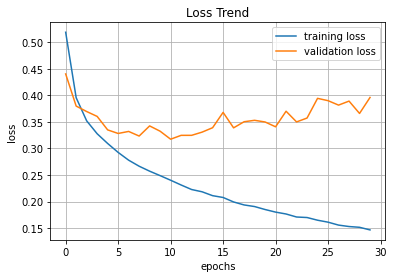

In [9]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

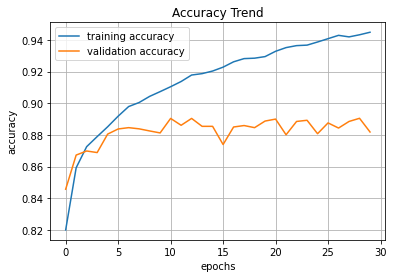

In [10]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()